In [ ]:
# Machine Learning I - Exercise Sheet 01

### Required Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

## Exploring Dataset

In [2]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

## Exercise 1. Min-Max normalization

$X_{norm}=\frac{X - X_{min}}{X_{max}-X_{min}}$.
Scale using the difference of maximum and minimum range value and adding the minimum range value.

In [ ]:
def min_max_scale(data, min_range=0, max_range=1):
    """
    Implements min-max scaling.
    """
    total_min = np.amin(data)
    total_max = np.amax(data)
    return ((max_range - min_range)*(data - total_min)) / (total_max - total_min) + min_range, total_min, total_max

In [4]:
def task_one(data, separate):
    """
    Helper function for the first exercise.
    """
    if separate:
        for i, row in enumerate(data):
            data[i], _, _ = min_max_scale(row) # loop over the samples of the dataset.          
    else:
        data, _, _ = min_max_scale(data)
    return data

### a) scale all vectors separately

In [5]:
iris = np.array(datasets.load_iris().data)
task_one(iris, True)[:5]

array([[1.        , 0.67346939, 0.24489796, 0.        ],
       [1.        , 0.59574468, 0.25531915, 0.        ],
       [1.        , 0.66666667, 0.24444444, 0.        ],
       [1.        , 0.65909091, 0.29545455, 0.        ],
       [1.        , 0.70833333, 0.25      , 0.        ]])

### b) scale full dataset

In [ ]:
iris = np.array(datasets.load_iris().data)
task_one(iris, False)[:5]

## Exercise 2. Z-Score normalization

$z=\frac{X-\mu}{\sigma}$

In [7]:
def zscore(data):
    """
    Implements z-score normalization.
    """
    mean = np.sum(data) / data.size
    std = np.sqrt(np.sum(np.square(data-mean)) / data.size)
    return (data - mean) / std

In [8]:
def task_two(data, separate):
    """
    Helper function for the second exercise.
    """
    if separate:
        for i in range(data.shape[1]):
            data[:,i] = zscore(data[:,i]) # loop over the features of the dataset
    else:
        data = zscore(data)
    return data

### a) zscore with separate vectors

In [9]:
iris = np.array(datasets.load_iris().data)
task_two(iris, True)[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

### b) zscore with full dataset

In [10]:
iris = np.array(datasets.load_iris().data)
task_two(iris, False)[:5]

array([[ 0.82858665,  0.01798522, -1.04592915, -1.65388022],
       [ 0.72726147, -0.23532773, -1.04592915, -1.65388022],
       [ 0.62593629, -0.13400255, -1.09659174, -1.65388022],
       [ 0.5752737 , -0.18466514, -0.99526657, -1.65388022],
       [ 0.77792406,  0.06864781, -1.04592915, -1.65388022]])

## Exercise 3. Plotting I

### a)

In [11]:
def random_three_plot(title, x_axis_label, y_axis_label):
    """
    The function generates three random 1D arrays and displays them.
    """
    fig, ax = plt.subplots()
    values1 = np.random.uniform(low=0.0, high=5.0, size=100)
    values2 = np.random.uniform(low=5.0, high=6.0, size=100)
    values3 = np.random.uniform(low=6.0, high=10.0, size=100)
    p1, = ax.plot(values1, 'b--')
    p2, = ax.plot(values2, 'g-', marker='o', mfc='m', mec='m')
    p4, = ax.plot(values3, 'r:', marker='^', mfc='k', mec='k')
    plt.ylabel(y_axis_label)
    plt.xlabel(x_axis_label)
    plt.title(title)
    ax.legend(['values1', 'values2', 'values3'],
              bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

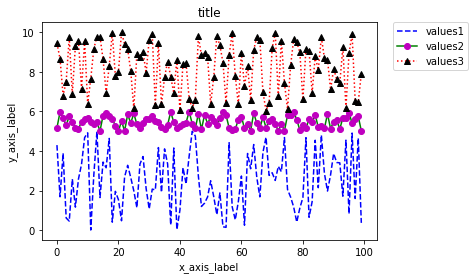

In [12]:
random_three_plot('title', 'x_axis_label', 'y_axis_label')

### b) 

In [13]:
def compare_iris_data2d():
    """
    Loads the Iris dataset and plots the first 30 samples as an 
    image before and after Min-Max normalization.
    """
    iris = datasets.load_iris()
    data1 = np.array(iris.data)
    data2 = np.array(iris.data)
    data3 = np.array(iris.data)
    titles = ['No normalization', 'Normalized vectors', 'Normalized dataset']
    all_dataset = [data1[:30], task_one(data2, True)[:30], task_one(data3, False)[:30]]
    fig, ax = plt.subplots(1, 3)
    for i, my_data in enumerate(zip(titles, all_dataset, ax)):
        im = ax[i].imshow(my_data[1])
        ax[i].set_title(my_data[0])
        plt.colorbar(im, ax=ax[i])
    plt.tight_layout()
    plt.show()

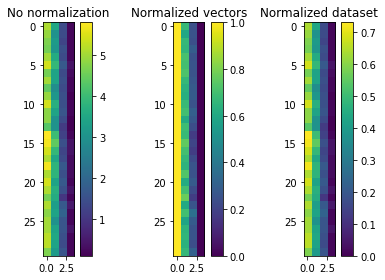

In [14]:
compare_iris_data2d()

### c)

In [15]:
def compare_iris_scatter():
    """
    Loads the Iris dataset and plots sepal length and sepal 
    width before and after z-score normalization.
    """
    iris = datasets.load_iris()
    data1 = np.array(iris.data)
    data2 = np.array(iris.data)   
    fix, ax = plt.subplots(1, 2)
    titles = ['No z-score', 'Z-score normalization']
    all_dataset = [data1, task_two(data2, True)]
    for i, my_data in enumerate(zip(titles, all_dataset, ax)): # iterate over all tuples
        ax[i].scatter(my_data[1][:,0], my_data[1][:,1])
        ax[i].set_xlabel('Sepal length')
        ax[i].set_ylabel('Sepal width')
        ax[i].set_title(my_data[0])
    plt.tight_layout() # gives each subplot adequate space
    plt.show()

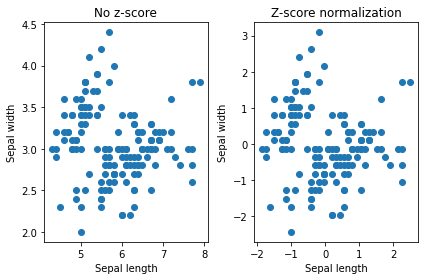

In [16]:
compare_iris_scatter()